# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Цель проекта:
Выявить параметры, влияющие на стоимость объекта недвижимости

### План работ:
- Изучить общую информацию о полученных данных.
- Выполнить предобработку данных:
    - заполнить пропущенные значения;
    - изменить типы данных;
    - устранить неявные дубликаты;
    - устранить аномальные значения.
- Вычислить и добавить столбцы, содержащую дополнительную информацию о недвижимости:
    - цена за 1 квадратный метр;
    - день / месяц / год публикации;
    - тип этажа квартиры (первый / последний / другой);
    - расстояние  до центра в км.
- Изучить параметры недвижимости и построить гистограммы для каждого параметра.
- Изучить, как быстро продавались квартиры (задание 1).
- Изучить, какие факторы больше всего влияют на общую (полную) стоимость объекта (задание 2).
- Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений (задание 3).
- Вычислить для г.Санкт-Петербург среднюю цену близости к центру города за каждый км.

### Данные в таблице:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony          — число балконов
- ceiling_height    — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data = pd.read_csv('C:/dataset/real_estate_data.csv', sep='\t')
display (data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В следующих столбцах присутствуют пропуски и из 23699 строк заполнены значениями:

<hr>

*Пропуски в следующих столбцах могут быть связаны как с человеческим фактором (например, нежеланием продавца заполнять в объявлении все графы), так и с техническим фактором (например,сбой при выгрузке данных).*


>**locality_name - 23650 (название населённого пункта)**<br>*пропуски в данном столбце удалим, поскольку значения данного столбца являются ключевыми для анализа, также проверим столбец на наличие неявных дубликатов*

>**ceiling_height - 14504 (высота потолков (м))** <br>*учитывая специфику застройки Санкт-Петербурга, заполним пропуски медианными значениями<br>для СПб и для остальных населенных пунктов*

>**floors_total - 23613 (всего этажей в доме)**<br>*заполним пропуски медианными значениями для различных населенных пунктов*

>**living_area - 21796 (жилая площадь в квадратных метрах (м²))**<br>**kitchen_area - 21421 (площадь кухни в квадратных метрах (м²))**<br>*пропуски в данных столбцах заполним медианными значениями для различного количества комнат в квартире*

>**is_apartment - 2775  (апартаменты (булев тип))**<br>*пропуски в данном столбце заполнять нет необходимости, т.к. в анализе  эти данные не будут использованы<br>заменим тип данных на bool, согласно требованию задачи*

>**balcony - 12180 (число балконов)**<br>*пропуски в данном столбце заполнять нет необходимости, т.к. в анализе  эти данные не будут использованы

<hr>

*Данные о расстоянии до центра, аэропорта, ближайшего парка и водоёма получены автоматически на основе картографических данных и пропуски в данных столбцах, вероятно, связаны с ошибками при выгрузке данных. Также, можно предположить, что пропуски в столбцах с расстоянием до парка/водоема связаны с их отсутствием в радиусе 3 км.*

>**airports_nearest - 18157 (расстояние до ближайшего аэропорта (м))**<br>*пропуски в данном столбце заполним медианным значением для различных населенных пунктов, за исключением Санкт-Петербурга, поскольку площадь города наибольшая из всех населенных пукнтов и замена медианой может исказить результаты.*

>**cityCenters_nearest - 18180 (расстояние до центра города (м))**<br>*пропуски в данном столбце заполним медианным значением для различных населенных пунктов*

>**parks_around3000 - 18181 (число парков в радиусе 3 км)**
>**parks_nearest - 8079  (расстояние до ближайшего парка (м))**<br>*пропуски в данных столбцах заполним медианными значениями для различных населенных пунктов*

>**ponds_around3000 - 18181 (число водоёмов в радиусе 3 км))**<br>**ponds_nearest - 9110 (расстояние до ближайшего водоёма)** <br>*пропуски в данных столбцах заполнять нет необходимости, т.к. в дальнейшей работе эти данные не будут использованы*

<hr>

*Значения в столбце с количеством дней размещения объявления явно подсчитывались автоматически, поэтому их пропуски могут быть связаны только с техническим сбоем* 

>**days_exposition - 20518 (сколько дней было размещено объявление)**<br>*пропуски в данном столбце заполним медианными значениями для различных населенных пунктов и различных количеств комнат в квартире*

<hr>

>**first_day_exposition**<br>в столбце преобразуем данные в формат datatime

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

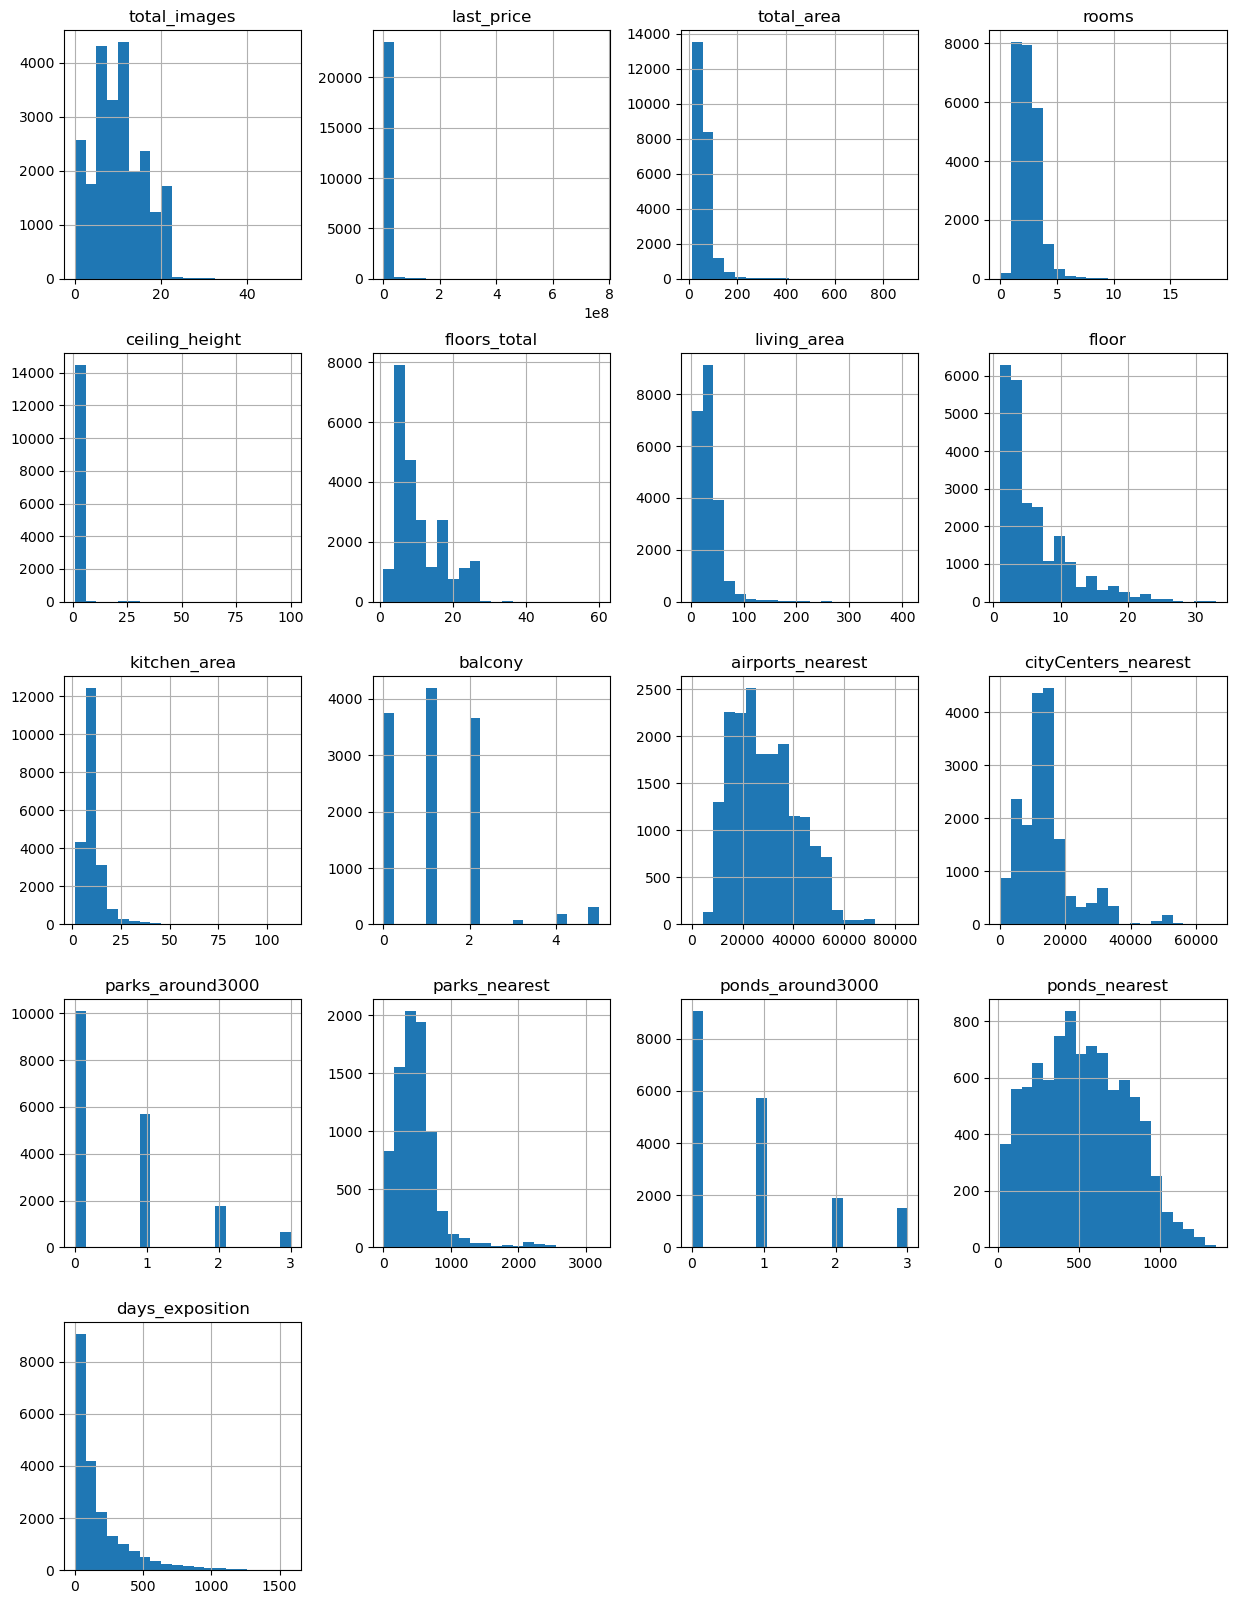

In [3]:
data.hist(figsize=(15,20), bins=20)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


По графикам и числовому описанию видно, что в столбцах last_price, total_area, rooms, ceiling_height, living_area, kitchen_area пристутсвуют аномальные значения.

## Предобработка данных

### **Столбец 'locality_name' (название населенного пункта)**
Для начала удалим строки, с пропусками в данном столбце. 
Далее выведем уникальные значения и их количество и визуально отметим возможные дубликаты.

In [5]:
data = data.dropna(axis='index', subset='locality_name').reset_index(drop=True)

In [6]:
display (data['locality_name'].value_counts().count())
#data['locality_name'].unique()

364

Приведем наименования населенных пунктов к единому формату:
- приведем все наименования к нижнему регистру 
- заменим в наименованиях населенных пунктов буквы "ё" на "е"
- заменим "городской поселок" на "поселок городского типа"
- заменим "поселок при жд станции", "поселок станции" и ""коттеджный поселок" на "поселок"
- заменим "садоводческое некомерческое товарищество" на "садовое товарищество"

In [7]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')

In [8]:
display(data['locality_name'].value_counts().count())

319

### **Столбец 'ceiling_height' (высота потолков)**
На гистограмме в начале проекта видно, что высота потолков варьируется от 0 до 100 м, поэтому для потолков от 25 м примем, что это опечатка и поделим эти значения на 10.

In [9]:
data.loc[(data['ceiling_height']>25), 'ceiling_height'] /= 10

Далее рассмотрим отдельно высоту потолков для недвижимости в Спб и в остальных населенных пунктах. Для каждого из этих вариантов выведем числовое описание данных, на графике boxplot найдем визуально границы нормального распределения.

**1. Недвижимость не в Спб**<hr>

In [10]:
display (data.query('locality_name!="санкт-петербург"')['ceiling_height'].describe())
#plt.ylim(2.1, 3,1)
data.query('locality_name!="санкт-петербург"').boxplot(['ceiling_height'])

На графике нашли границы нормального распределения - 2,2 и 3,0. Значения, выходящие за эти границы, приведем к формату NaN.

In [11]:
data.loc[((data['ceiling_height']<2.2)&(data['locality_name']!='санкт-петербург')), 'ceiling_height'] = np.nan
data.loc[((data['ceiling_height']>3.0)&(data['locality_name']!='санкт-петербург')), 'ceiling_height'] = np.nan

**2. Недвижимость в Спб**<hr>

In [12]:
display(data.query('locality_name == "санкт-петербург"')['ceiling_height'].describe())
#plt.ylim(2,6.5)
data.query('locality_name == "санкт-петербург"').boxplot(['ceiling_height'])

На диаграмме размаха большое количество выбросов за границей нормального распределения, что может быть связано с особенностями застройки города. Нижнюю границу для высоты потолка отметим по диаграмме (2,3 м), а верхнюю установим в точке уменьшения количества выбросов (6 м). Остальные значения примем за аномальные и приведем к формату NaN.

In [13]:
data.loc[((data['ceiling_height']<2.3)&(data['locality_name']=='санкт-петербург')), 'ceiling_height'] = np.nan
data.loc[((data['ceiling_height']>6)&(data['locality_name']=='санкт-петербург')), 'ceiling_height'] = np.nan

Рассмотрим снова числовое описание для каждой группы.

In [14]:
display ('НЕ СПБ', data.query('locality_name!="санкт-петербург"')['ceiling_height'].describe())
display ('СПБ', data.query('locality_name=="санкт-петербург"')['ceiling_height'].describe())
display ('____________', data['ceiling_height'].describe())

Поскольку, медианное значение для этих двух групп не сильно отличается, заменим значения NaN на медианное значение всего столбца.

In [15]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

### **Столбец floors_total (количество этажей в доме)**

Оценим числовые характеристики данного столбца и диаграмму размаха. 

In [16]:
display (data['floors_total'].describe())
#plt.ylim(28, 60)
data.boxplot(['floors_total'])

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Рассмотрим строки с значением этажности выше 28 и не в Санкт-Петербурге.

In [17]:
data.loc[data.query('floors_total>28 & locality_name!="санкт-петербург"').index]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2251,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.40,4,NaN,...,7.4,NaN,кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
3792,10,4100000.0,43.2,2018-09-24T00:00:00,1,2.60,29.0,14.35,18,NaN,...,14.4,2.0,поселок парголово,53734.0,19942.0,0.0,NaN,0.0,NaN,45.0


Выявили 2 значения, которые могут быть аномальными. Поиск в сети по данным городам дал, что в поселке Парголево действительно есть такие высотные здания, а вот в Кронштадте максимальная этажность здания - 15, поэтому примем это за опечатку и разделим это значение на 10.

In [18]:
data.loc[((data['floors_total']==60)&(data['locality_name']=='кронштадт')), 'floors_total']/=10

Теперь с помощью цикла для каждого населенного пункта заменим пропущенные значения об этажности здания медианным значением и проверим, что все пропуски заполнены.

In [19]:
for name in data['locality_name'].unique():
    data.loc[((data['locality_name'] == name) &\
              (data['floors_total'].isna())), 'floors_total']\
    = data.loc[(data['locality_name'] == name, 'floors_total')].median()
data['floors_total'].isna().sum()

0

Все пропуски заполены. Заменим тип данных в столбце на int.

In [20]:
data['floors_total'] = data['floors_total'].astype('int64')

### **Столбец rooms (количество комнат)** 
Рассмотрим диаграму размаха. 

In [21]:
data.boxplot(['rooms'])

По графику видим, что нормальное распределение начинается с нуля, при том что комнат 0 быть не может. Поэтому рассмотрим подробнее квартиры с нулевыми комнатами и их общие площади.

In [22]:
#plt.ylim (0, 100)
display (data.query('rooms == 0').boxplot(['total_area']))

Видим, что есть значения, похожие на случайные. Рассмотрим квартиры с нулевыми значениями комнат и общей площадью более 50.

In [23]:
data.loc[data.query('rooms == 0 & total_area > 50').index]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3454,6,7400000.0,73.6,2017-05-18T00:00:00,0,2.65,3,50.0,1,NaN,...,NaN,0.0,санкт-петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0
13591,16,8100000.0,58.4,2019-04-26T00:00:00,0,3.30,7,33.0,6,NaN,...,NaN,NaN,санкт-петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN
19357,5,71000000.0,371.0,2018-07-26T00:00:00,0,3.57,7,NaN,6,NaN,...,NaN,NaN,санкт-петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0
20045,10,16300000.0,98.4,2017-11-08T00:00:00,0,3.10,5,60.5,2,NaN,...,NaN,NaN,санкт-петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0
21186,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5,68.0,5,NaN,...,NaN,0.0,санкт-петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0


Видим, что все квартиры находятся в Санкт-Петербурге, поэтому, возможно, такие квартиры действительно существуют. Но поскольку только одна из этих квартир имеет свободную планировку, а сколько комнат имеют остальные узнать нет возможности, то удалим эти строки. Для остальных нулевых квартир примем количество комнат за 1. 

In [24]:
data.loc[((data['rooms'] == 0) & (data['total_area']>50) & (data['open_plan'] == False)), 'rooms'] = np.nan
data = data.dropna(axis='index', subset='rooms').reset_index(drop=True)
data['rooms'] = data['rooms'].replace(0, 1)

Рассмотрим квартиры с количеством комнат более 5.

In [25]:
data.query('rooms>5').groupby('locality_name').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
locality_name,,,,,,,,,,,,,,,,,,,,,
деревня бор,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,1
колпино,1,1,1,1,1,1,1,1,1,0,...,1,1,0,1,1,1,1,1,1,1
красное село,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,1
павловск,1,1,1,1,1,1,1,1,1,0,...,1,1,0,1,1,1,1,1,1,1
поселок парголово,1,1,1,1,1,1,1,0,1,0,...,1,0,0,1,1,1,0,1,0,1
пушкин,3,3,3,3,3,3,3,3,3,0,...,3,3,2,3,3,3,3,3,3,2
санкт-петербург,186,186,186,186,186,186,186,174,186,10,...,186,168,71,182,183,183,126,183,123,129
сосновый бор,1,1,1,1,1,1,1,1,1,0,...,1,1,1,0,0,0,0,0,0,1


Видим, что большинство из них находятся в Спб, вероятно такие квартиры действительно существуют и их не очень много. Для дальнейшего анализа удалим эти строки.

In [26]:
data = data.query('rooms<=5').reset_index(drop=True)

Для дальнейших операций изменим значения столбца с float на int.

In [27]:
data['rooms'] = data['rooms'].astype('int64')

### **Столбец living_area (жилая площадь(м²))**
Выведем числовое описание данного столбца, диаграмму boxplot. Оценим полученные данные и выведем срез подозрительных данных.

In [28]:
display (data['living_area'].describe())
display (data.boxplot(['living_area']))
display (data.query('living_area<10'))
display (data.query('living_area>200'))

count    21566.000000
mean        33.464660
std         18.549032
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        301.500000
Name: living_area, dtype: float64

Из полученного среза видно, что данные, с жилой площадью более 200  вероятно соответствуют действительности и не носят аномальный/ошибочный характер: все эти квартиры находятся в Спб, имеют большую общую площадь, высокую стоимость и тд.  При этом видим, что есть такие квартиры, где странное соотношение жилой площади к общей площади. 
Пропущенные значения заменим медианами в зависимости от количества комнат в квартире. После примем значения менее 10 за аномальные и удалим эти строки.

In [29]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))

In [30]:
data = data.query('living_area>=10').reset_index(drop=True)

### **Столбец kitchen_area (площадь кухни (м²))** 
Выведем числовое описание данного столбца, диаграмму boxplot. Оценим полученные данные и выведем срез подозрительных данных.

In [31]:
display (data['kitchen_area'].describe())
display (data.boxplot('kitchen_area'))
data.query('kitchen_area>50')

count    21183.000000
mean        10.458685
std          5.673322
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64

Из полученного среза видно, что данные, вероятно соответствуют действительности и не носят аномальный/ошибочный характер: все эти квартиры находятся в Спб, имеют большую общую площадь, высокую стоимость и тд. Поэтому далее пропущенные значения заменим медианами в зависимости от количества комнат в квартире и посмотрим как изменились числовые данные по данному столбцу. 

In [32]:
for room in data['rooms'].unique():
    data.loc[((data['rooms'] == room) & (data['kitchen_area'].isna())), 'kitchen_area']\
    = data.loc[(data['rooms'] == room, 'kitchen_area')].median()

### **Столбец airports_nearest (расстояние до ближайшего аэропорта (м))**
Пропуски в данном столбце заполним медианным значением для различных населенных пунктов, за исключением Санкт-Петербурга, поскольку площадь города наибольшая из всех населенных пукнтов и замена медианой может исказить результаты.

In [33]:
for name in data['locality_name'].unique():
    data.loc[((data['locality_name'] == name)\
              &(data['locality_name'] != "санкт-петербург")\
              &(data['airports_nearest'].isna()), 'airports_nearest')]\
    = data.loc[(data['locality_name'] == name), 'airports_nearest'].median()

Пропуски заполнены, за исключением тех объявлений, где по населенному пункту нет ни одного значения для вычисления медианы. 

### **cityCenters_nearest (расстояние до центра города (м))**
Для начала переименуем столбец. Пропуски в данном столбце заполним медианным значением для различных населенных пунктов, за исключением Санкт-Петербурга, поскольку площадь города наибольшая из всех населенных пукнтов и замена медианой может исказить результаты. Но сначала рассмотрим внимательнее сгруппированный по locality_name срез с пропусками в данном столбце.

In [34]:
data.rename(columns={'cityCenters_nearest':'city_centers_nearest'}, inplace = True)

In [35]:
data.query('locality_name != "санкт-петербург" & city_centers_nearest.isna()').groupby('locality_name')['city_centers_nearest'].sum().sort_values()

locality_name
бокситогорск             0.0
поселок кобринское       0.0
поселок кобралово        0.0
поселок кирпичное        0.0
поселок кингисеппский    0.0
                        ... 
деревня тихковицы        0.0
деревня терпилицы        0.0
деревня тарасово         0.0
деревня суоранда         0.0
шлиссельбург             0.0
Name: city_centers_nearest, Length: 300, dtype: float64

Видим, что заменить медианными значения пропуски невозможно, поскольку в полученном срезе населенных пунктов нет ни одного значения для поиска медианы.

### **parks_around3000 (число парков в радиусе 3 км)**
пропуски в данных столбцах заполним медианными значениями для различных населенных пунктов. Но сначала также рассмотрим подробнее срез с пропусками.

In [36]:
data.query('parks_around3000.isna()').groupby('locality_name')['parks_around3000'].sum().sort_values()

locality_name
бокситогорск             0.0
поселок кобринское       0.0
поселок кобралово        0.0
поселок кирпичное        0.0
поселок кингисеппский    0.0
                        ... 
деревня тихковицы        0.0
деревня терпилицы        0.0
деревня тарасово         0.0
деревня суоранда         0.0
шлиссельбург             0.0
Name: parks_around3000, Length: 300, dtype: float64

Также видим, что заменить медианными значения и эти пропуски невозможно по той же причине.

### **parks_nearest (расстояние до ближайшего парка (м))**
Пропуски в данных столбцах заполним медианными значениями для различных населенных пунктов.

In [37]:
data['parks_nearest'].isna().value_counts()

True     15508
False     7918
Name: parks_nearest, dtype: int64

In [38]:
for name in data['locality_name'].unique():
    data.loc[((data['locality_name'] == name)\
              &(data['parks_nearest'].isna()), 'parks_nearest')]\
    = data.loc[(data['locality_name'] == name), 'parks_nearest'].median()

In [39]:
data['parks_nearest'].isna().value_counts()

False    17432
True      5994
Name: parks_nearest, dtype: int64

Видим, что часть нулевых значений заполнилась. Рассмотрим незаполненные данные.

In [40]:
data.query('parks_nearest.isna()').groupby('locality_name')['parks_nearest'].sum().sort_values()

locality_name
бокситогорск              0.0
поселок левашово          0.0
поселок красносельское    0.0
поселок красная долина    0.0
поселок котельский        0.0
                         ... 
деревня торосово          0.0
деревня тойворово         0.0
деревня тихковицы         0.0
деревня хапо-ое           0.0
шлиссельбург              0.0
Name: parks_nearest, Length: 307, dtype: float64

Видим, что заменить медианными значения пропуски невозможно, поскольку в полученном срезе населенных пунктов нет ни одного значения для вычисления медианы

### **days_exposition (сколько дней было размещено объявление)**
пропуски в данном столбце заполним медианными значениями для различных населенных пунктов и различного количества комнат в квартире.

In [41]:
data['days_exposition'].isna().value_counts()

False    20308
True      3118
Name: days_exposition, dtype: int64

In [42]:
for name in data['locality_name'].unique():
    for room in data['rooms'].unique():
        data.loc[((data['locality_name'] == name)\
                  &(data['rooms'] == room)\
                  &(data['days_exposition'].isna()), 'days_exposition')]\
        = data.loc[((data['locality_name'] == name) & (data['rooms'] == room), 'days_exposition')].median()

In [43]:
data['days_exposition'].isna().value_counts()

False    23304
True       122
Name: days_exposition, dtype: int64

In [44]:
data.query('days_exposition.isna()').groupby('locality_name')['days_exposition'].sum().sort_values()

locality_name
деревня большой сабск                0.0
поселок городского типа токсово      0.0
поселок городского типа форносово    0.0
поселок дзержинского                 0.0
поселок заводской                    0.0
                                    ... 
деревня тойворово                    0.0
деревня снегиревка                   0.0
деревня сижно                        0.0
каменногорск                         0.0
сосновый бор                         0.0
Name: days_exposition, Length: 70, dtype: float64

Пропуски заполнены, за исключением тех объявлений, где по населенному пункту нет ни одного значения для вычисления медианы.

### **last_price (цена)**
Рассмотрим столбец, выявим аномальные значения

In [45]:
display (data['last_price'].describe())
display (data.query('last_price<1000000').sort_values(by='last_price'))
display (data.query('last_price>40000000').sort_values(by='last_price'))

count    2.342600e+04
mean     6.254073e+06
std      8.153486e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      4.013000e+08
Name: last_price, dtype: float64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18633,0,40348248.0,284.0,2016-11-24T00:00:00,4,2.65,9,104.76,6,NaN,...,14.77,0.0,санкт-петербург,19095.0,4529.0,0.0,462.0,0.0,NaN,256.0
21276,1,40488000.0,144.6,2019-04-01T00:00:00,3,3.00,11,82.90,8,False,...,16.20,NaN,санкт-петербург,28282.0,6941.0,2.0,365.0,3.0,215.0,114.0
408,1,40662000.0,151.0,2014-12-09T00:00:00,3,2.65,8,85.00,3,NaN,...,23.00,1.0,санкт-петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,594.0
11584,0,41484000.0,160.0,2015-02-28T00:00:00,3,2.65,6,86.00,3,NaN,...,21.00,1.0,санкт-петербург,32999.0,5856.0,1.0,607.0,3.0,757.0,513.0
16852,11,41900000.0,170.0,2018-02-26T00:00:00,4,2.65,9,62.00,4,NaN,...,56.00,2.0,санкт-петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18951,20,160000000.0,243.0,2018-11-12T00:00:00,5,2.65,5,145.00,4,NaN,...,33.00,NaN,санкт-петербург,22640.0,555.0,3.0,285.0,1.0,200.0,18.0
8799,13,190870000.0,268.0,2016-03-25T00:00:00,3,2.65,8,132.00,7,NaN,...,40.00,NaN,санкт-петербург,32440.0,5297.0,0.0,462.0,2.0,198.0,901.0
22572,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6,63.70,6,NaN,...,30.20,NaN,санкт-петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,90.0
1417,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7,95.00,5,NaN,...,40.00,NaN,санкт-петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0


Видим аномально низкое и аномально высокое значение. Также есть квартиры с высоким значением цены, которые похожи на действительно существующие, но их количество мало для анализа.  Для дальнейшего анализа удалим строки с данными значениями.

In [46]:
data = data.query('last_price>13000').reset_index(drop=True)
data = data.query('last_price<40000000').reset_index(drop=True)

### total_area (общая площадь)
Рассмотрим столбец, выявим аномальные значения

count    23272.000000
mean        57.910820
std         27.016826
min         12.000000
25%         40.000000
50%         51.400000
75%         68.100000
max        470.300000
Name: total_area, dtype: float64

<AxesSubplot:>

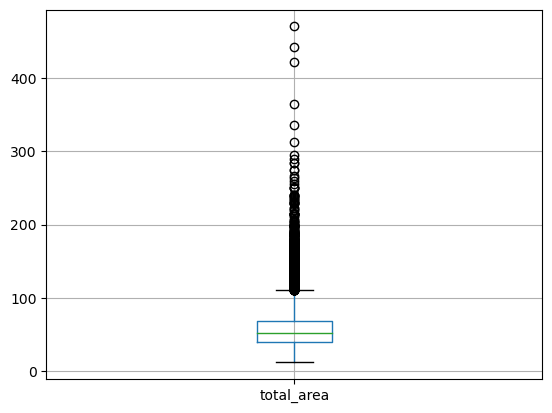

In [47]:
display (data['total_area'].describe())
display (data.boxplot('total_area'))
data.query('total_area>=200').sort_values(by='total_area')

Видим, существуют квартиры с большими площадями, при этом большинство находятся в Спб. Таких квартир не много, поэтому для дальнецшего анализа удалим эти строки. 

In [48]:
data = data.query('total_area<200').reset_index(drop=True)

### **Изменение типов данных столбцов**
Изменим типы данных в столбцах first_day_exposition и is_apartment

In [49]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [50]:
data['is_apartment'] = data['is_apartment'].astype('boolean', errors='ignore')

## Посчитайте и добавьте в таблицу новые столбцы

### Цена одного квадратного метра -   meter_price

In [51]:
data['meter_price'] = (data['last_price'] / data['total_area']).astype('int64')

### День недели (week_day), месяц ('month') и год ('year') публикации объявления

In [52]:
data['week_day'] = data['first_day_exposition'].dt.weekday

In [53]:
data['month'] = data['first_day_exposition'].dt.month

In [54]:
data['year'] = data['first_day_exposition'].dt.year

### Тип этажа квартиры - floor_type 

In [55]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [56]:
data['floor_type'] = data.apply(floor_type, axis=1)

### Расстояние в км до центра города - city_centers_nearest_km

In [74]:
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

### Итог предобработки
Рассмотрим основные характеристики обработанных данных и сравним с изначальными значениями.

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23213 entries, 0 to 23212
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23213 non-null  int64         
 1   last_price               23213 non-null  float64       
 2   total_area               23213 non-null  float64       
 3   first_day_exposition     23213 non-null  datetime64[ns]
 4   rooms                    23213 non-null  int64         
 5   ceiling_height           23213 non-null  float64       
 6   floors_total             23213 non-null  int64         
 7   living_area              23213 non-null  float64       
 8   floor                    23213 non-null  int64         
 9   is_apartment             2715 non-null   boolean       
 10  studio                   23213 non-null  bool          
 11  open_plan                23213 non-null  bool          
 12  kitchen_area             23213 n

В ходе предобработки исключили из данных 486 строк, также заменили типы данных для столбцов first_day_exposition, rooms, floors_total, floor, is_apartment.

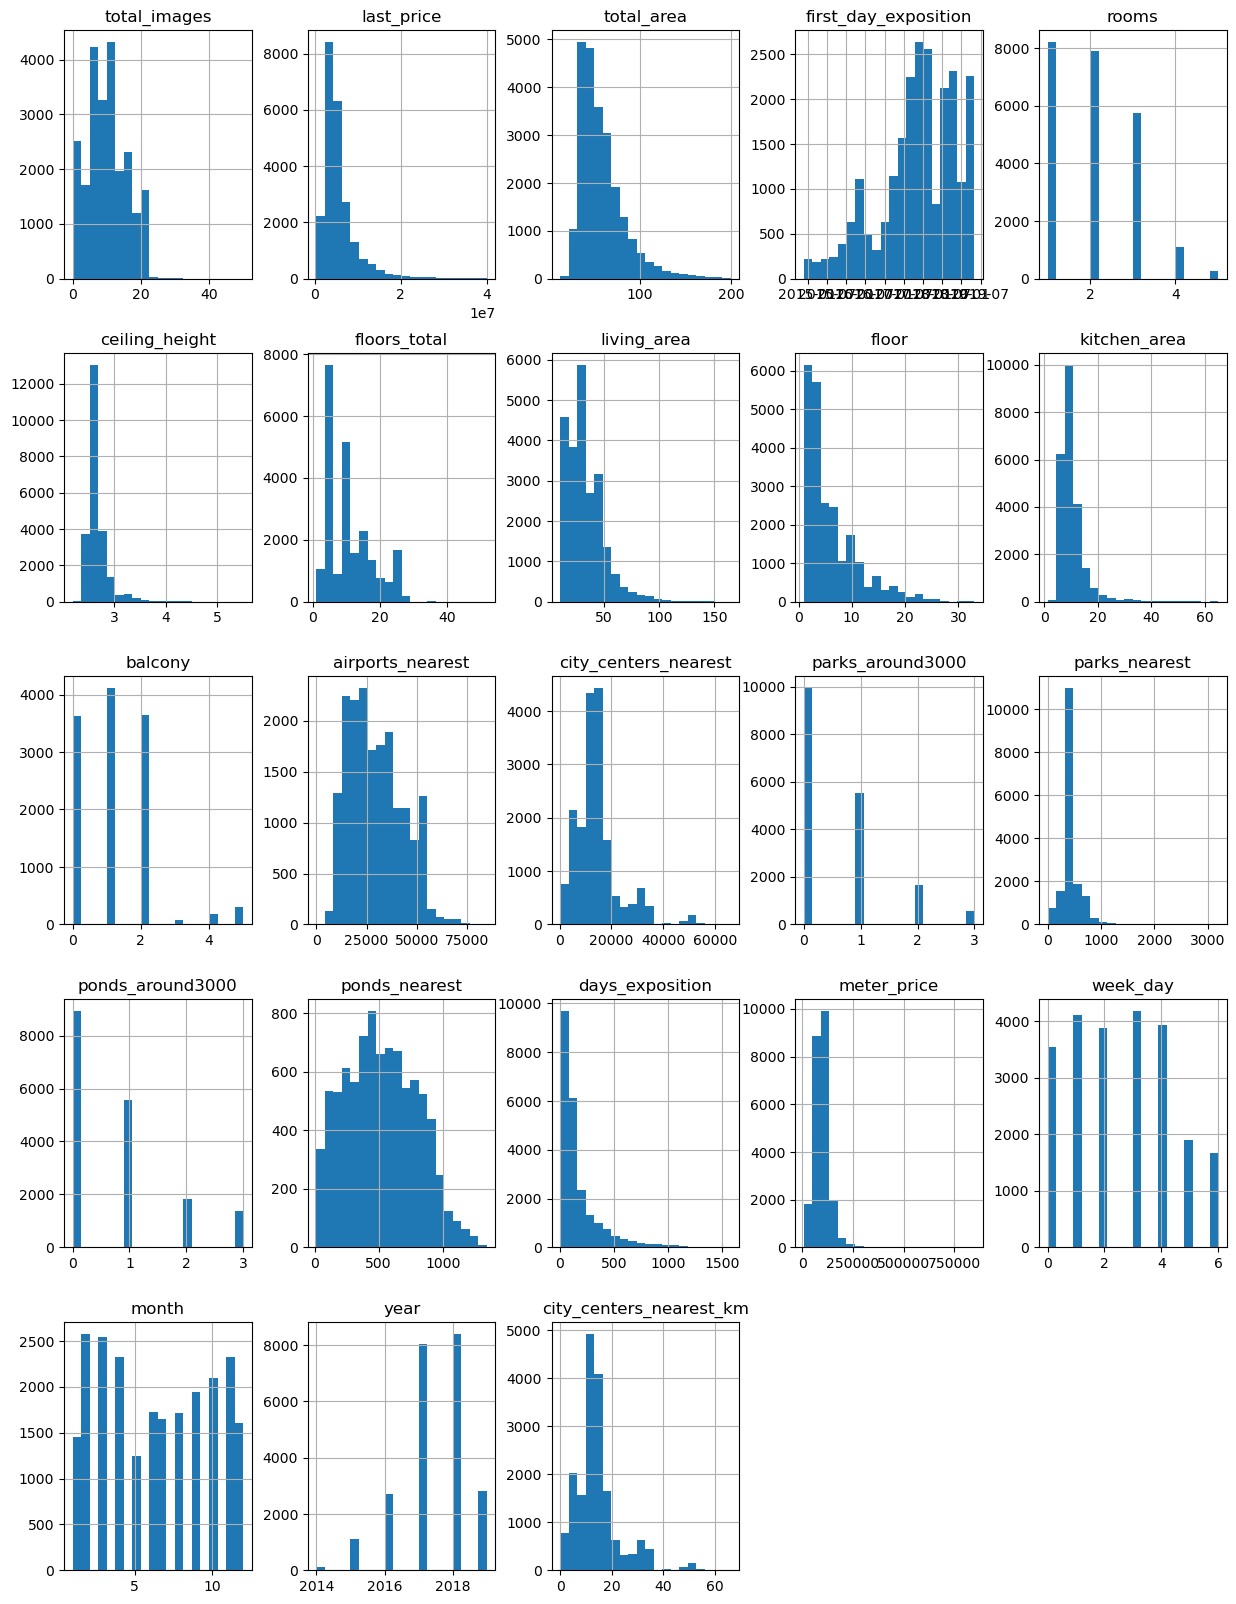

In [76]:
data.hist(figsize=(15,20), bins=20);

In [77]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23213.0,9.825270e+00,5.657164e+00,0.0,6.0,9.00,14.0,50.0
last_price,23213.0,5.751169e+06,4.251995e+06,430000.0,3400000.0,4600000.00,6600000.0,39990000.0
total_area,23213.0,5.742544e+01,2.511393e+01,12.0,40.0,51.30,68.0,199.2
rooms,23213.0,2.021755e+00,9.433829e-01,1.0,1.0,2.00,3.0,5.0
ceiling_height,23213.0,2.686376e+00,1.964011e-01,2.2,2.6,2.65,2.7,5.5
floors_total,23213.0,1.073760e+01,6.595599e+00,1.0,5.0,9.00,16.0,52.0
living_area,23213.0,3.270601e+01,1.628763e+01,10.0,18.3,30.00,42.0,164.7
floor,23213.0,5.912377e+00,4.898275e+00,1.0,2.0,4.00,8.0,33.0
kitchen_area,23213.0,1.017680e+01,4.851211e+00,1.3,7.2,9.00,11.2,65.0
balcony,11940.0,1.158375e+00,1.070726e+00,0.0,0.0,1.00,2.0,5.0


После предобработки видим, что графики стали более читаемы, вследствие исключения аномальных значений и среза группы дорогостоящих квартир с большой площадью. По числовым характиристикам видим, что после предобработки практически по всем столбцам уменьшилось ст.отклонение, изменились максимальные и минимальные значения, при этом значения квартилий не изменились либо изменились незначительно.
  - *общая площадь;*<br>большая часть продаваемой недвижимости имеет общую площадь от 30 до 70 м2,  при этом, начиная с 30м2, прослеживается закономерность - чем больше площадь, тем меньше таких квартир.   
  - *жилая площадь;*<br>большая часть недвижимости имеет жилую площадь от 18 до 42 м2. Равномерного распределения по данному показателю нет, что скорее всего этот показатель сильно коррелирует с количеством комнат.
  - *площадь кухни;*<br>большинство кухонь имеют площадь от 7 до 12 м2, и начиная примерно с 10м2 прослеживается закономерность - чем больше площадь кухни, тем меньше таких квартир.
  - *цена объекта;*<br>большая часть квартир находится в сегменте до 10 млн у.е. Также есть небольшое количество квартир с низкой ценой, но вероятно это квартиры находящиеся в малых населенных пунктах и за исключением таких квартир прослеживается закономерность, чем выше цена,тем меньше таких квартир в продаже.
  - *количество комнат;*<br>даже с учетом того, что в ходе предобработки были удалены квартиры с количеством комнат больше 5, видно, что подавляющее большинство недвижимости имеет от 1 до 3 комнат, в сравнении с этими категориями квартиры с 4, 5 и более комнатами практически не имеют значения.   
  - *высота потолков;*<br>несмотря на большое количество пропусков, и специфику застройки Санкт-Петербурга с недвижимостью с высокими потолками, большинство квартир имеют стандартную высоту потолков 2,6-2,7 м. Недвижимости с потолками выше 3 м незначительно мало.
  - *этаж квартиры;*<br>видна обратная зависимость: чем выше этаж - тем меньше таких квартир в продаже.  
  - *общее количество этажей в доме;*<br>большая часть квартир находится в типовых зданиях, на графиках видны пиковые значения для 5, 9, 6 и 25 этажных зданий.   
  - *расстояние до центра города в метрах;*<br>явной законемерности по данному параметру не прослеживатеся и есть некоторая схожесть с нормальным распределением, есть пиковые значения на определенных значениях удаленности от центра, вероятно, это связано с застройками городов и расположении более населенных спальных районов в некоторой удаленности от центра. 
  - *расстояние до ближайшего аэропорта;*<br>график по этому параметру похож на график нормального распределения, меньшая часть квартир находятся ближе/дальше от аэропорта, большая часть на среднем расстоянии.
  - *расстояние до ближайшего парка;*<br>график по этому столбцу, также, выглядит как нормальное распределение.
  - *день и месяц публикации объявления;*<br>Чаще всего объявления выкладывались во вторник и четверг, реже в понедельник среду, пятницу, минимальное количество объявлений - в выходные.  Реже всего квартиры выставляют на продажу в декабре, январе и мае, чаще всего - в феврале, марте и ноябре.

Рассмотрим распределение недвижимости по типу этажа квартиры («первый», «последний», «другой»).

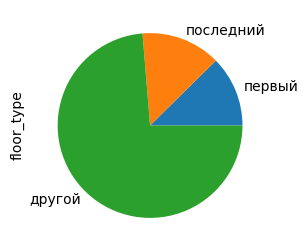

In [61]:
data.groupby('floor_type')['floor_type'].count().sort_values().plot(kind='pie', figsize=(3,3));

Чуть более 25% в сумме продаваемой недвижимости располагаются на первом и последнем этажах, другие этажи составляют около 75% всей недвижимости.

## Проведите исследовательский анализ данных

### Как быстро продавались квартиры (столбец days_exposition). 
Этот параметр показывает, сколько дней «висело» каждое объявление.

In [62]:
#display (data['days_exposition'].median())
#data['days_exposition'].mean()

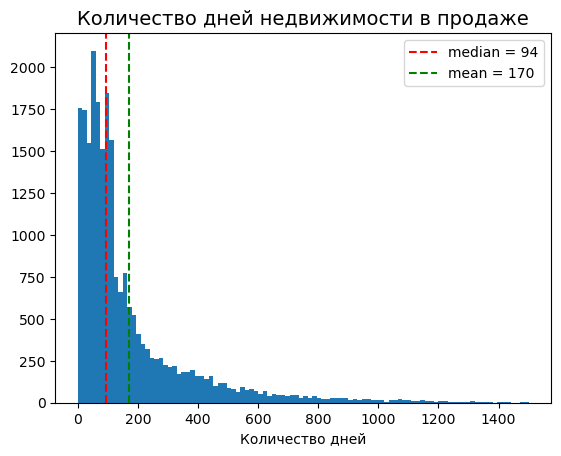

<AxesSubplot:>

count    23093.000000
mean       170.017105
std        205.835289
min          1.000000
25%         45.000000
50%         94.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64

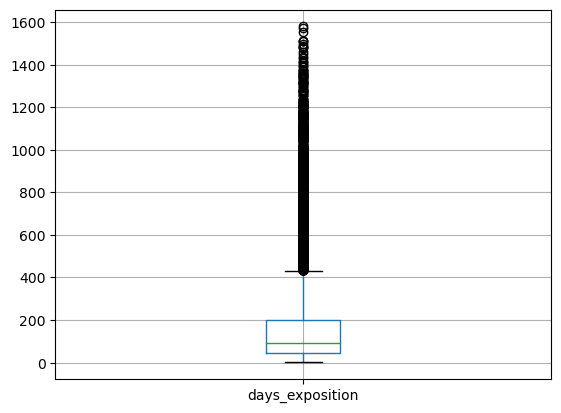

In [63]:
plt.hist(data['days_exposition'], bins=100, range=(0, 1500))
plt.axvline(data['days_exposition'].median(), color='r', linestyle='--', label='median = 94')
plt.axvline(data['days_exposition'].mean(), color='green', linestyle='--', label='mean = 170')
plt.title('Количество дней недвижимости в продаже', fontsize=14)
plt.xlabel('Количество дней')
plt.legend()
plt.show()
#plt.ylim(400,450)
display (data.boxplot(['days_exposition']))
data['days_exposition'].describe()

Среднее значение дней продажи - 170 дней, медианное - 94. Срок продажи, менее 45 дней (Q1) можно считать быстрой продажей,а срок более 200 дней (Q3) - долгой продажей, т.к. значения внутри этого интервала являются более распространенными и встречаются чаще. Необычно долгой продаже можно назвать продажу сроком более 430 дней, посколько по графику размаха такие продажи выходят за границы нормального распределения.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

>**Зависимость цены от общей площади, площади жилой и площади кухни**

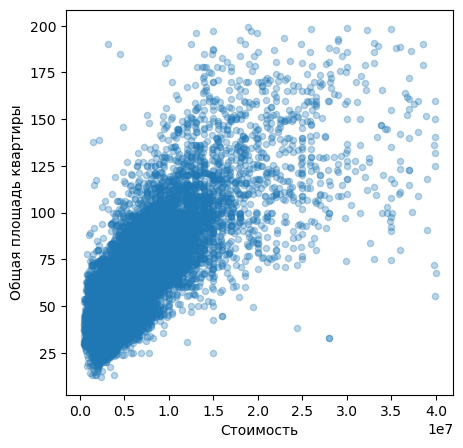

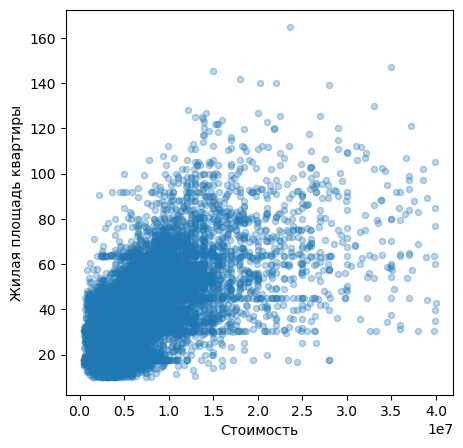

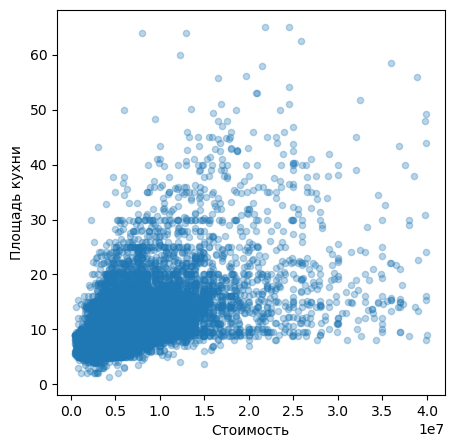

In [64]:
data.plot(x='last_price', y='total_area',  kind='scatter', alpha=0.3, figsize=(5,5));
plt.ylabel('Общая площадь квартиры')
plt.xlabel('Стоимость')
plt.show()
data.plot(x='last_price', y='living_area',  kind='scatter', alpha=0.3, figsize=(5,5))
plt.ylabel('Жилая площадь квартиры')
plt.xlabel('Стоимость')
plt.show()
data.plot(x='last_price', y='kitchen_area',  kind='scatter', alpha=0.3, figsize=(5,5));
plt.ylabel('Площадь кухни')
plt.xlabel('Стоимость')
plt.show()

Видим, что большая закономерность прослеживается в зависимости цены от общей площади, зависимость от жилой и кухонной площадей менее явная. Рассмотрим дополнительно корреляцию этих параметров.

In [65]:
display ('Кореляция между ценой и общей площадью квартиры:',data['last_price'].corr(data['total_area']))
display ('Кореляция между ценой и жилой площадью квартиры:',data['last_price'].corr(data['living_area']))
display ('Кореляция между ценой и кухонной площадью квартиры:',data['last_price'].corr(data['kitchen_area']))

'Кореляция между ценой и общей площадью квартиры:'

0.7722702639476713

'Кореляция между ценой и жилой площадью квартиры:'

0.6329363245453477

'Кореляция между ценой и кухонной площадью квартиры:'

0.5671230705369826

Видим подтверждение предыдущего вывода: цена больше зависит от общей площади, меньше от жилой и кухонной.

>**Зависимость цены от количества комнат**

'Корреляция между ценой и количеством комнат в квартире:'

0.46749767191683667

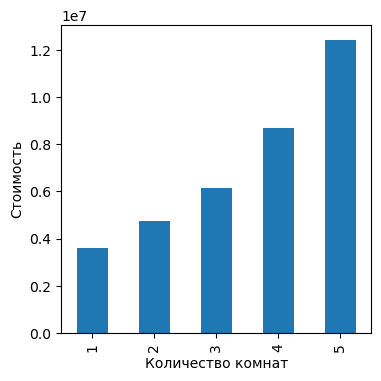

In [66]:
display ('Корреляция между ценой и количеством комнат в квартире:', data['last_price'].corr(data['rooms']))
data.groupby('rooms')['last_price'].median().plot(kind='bar', figsize=(4,4));
plt.ylabel('Стоимость');
plt.xlabel('Количество комнат');

По графику видна закономерность: чем больше комнат, тем выше цена. При этом коэффициент корреляции менее 0,5 и вероятно, есть большая завивисимость от другого параметра, например, от общей площади.

>**Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой)**

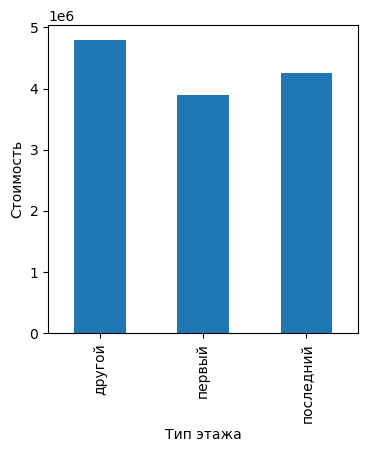

In [67]:
data.groupby('floor_type')['last_price'].median().plot(kind='bar', figsize=(4,4));
plt.ylabel('Стоимость');
plt.xlabel('Тип этажа');
plt.show()

По графику видно, что стоимость недвижимости на первом и последних этажах ниже, чем на других.

>**Зависимость цены от даты размещения (день недели, месяц, год)**

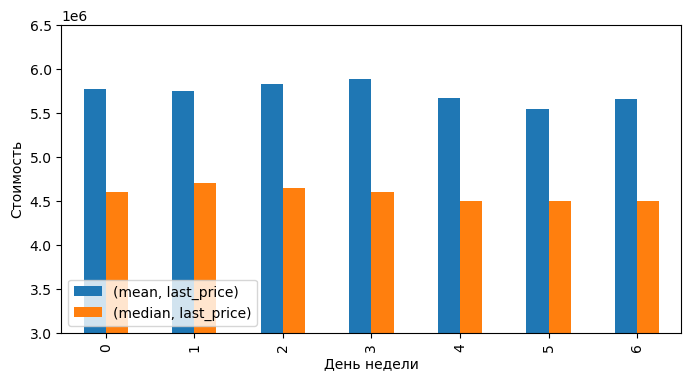

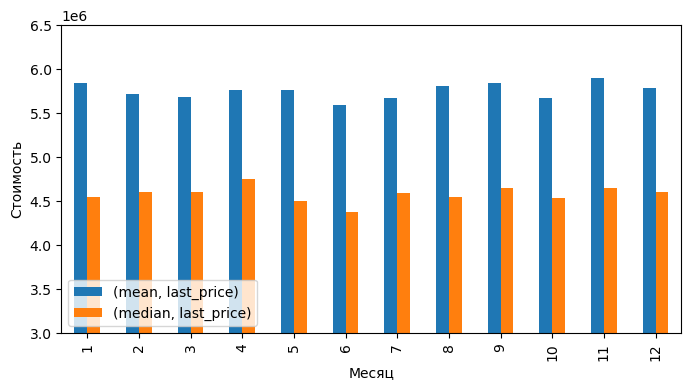

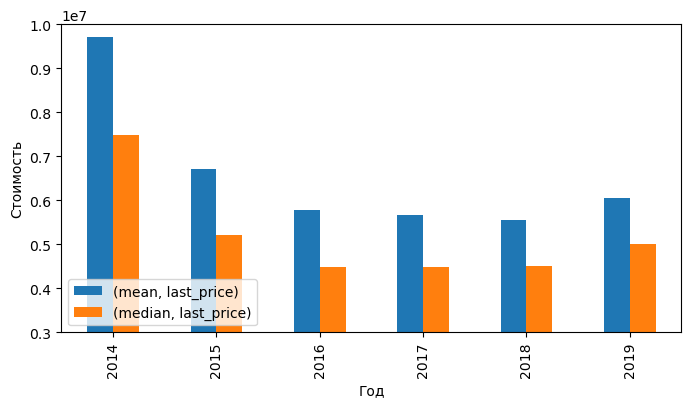

In [68]:
data.pivot_table(index='week_day', values='last_price', aggfunc=['mean', 'median']).plot(kind='bar', figsize=(8,4));
plt.xlabel('День недели')
plt.ylabel('Стоимость')
plt.legend(loc=3)
plt.ylim(3000000, 6500000)
plt.show()
data.pivot_table(index='month', values='last_price', aggfunc=['mean', 'median']).plot(kind='bar', figsize=(8,4));
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
plt.legend(loc=3)
plt.ylim(3000000, 6500000)
plt.show()
data.pivot_table(index='year', values='last_price', aggfunc=['mean', 'median']).plot(kind='bar', figsize=(8,4));
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.legend(loc=3)
plt.ylim(3000000, 10000000)
plt.show()

**Зависимость стоимости от дня недели** есть, но минимальная: в четверг - самая высокая средняя стоимость, далее идет спад до субботы, и, начиная с воскресенья, средняя цена возрастает; по медианной цене, самый высокий пик цены приходится на вторник, самый низкий - на пятницу.<br>**Зависимость стоимости от месяца** также есть, но минимальная и четкой закономерности не прослеживается: самая высокая средняя цена -  в ноябре, далее до июня цена снижается до минимальной (за исключением апреля и мая, где прослеживается небольшой рост). и далее цена снова растет (за исключением октября, где виден спад); медианная же цена имеет самый высокий пик- в апреле и самый низкий - в июне.<br>**Зависимость цены квартиры от года** продажи очевидна: и средняя и медианная цены были максимальными в 2014 году, далее стоимость недвижимости падала до минимального значения в 2018 году (при этом с 2016 по 2018 год медианная цена практически не менялась) и далее в 2019 снова наблюдается рост.

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [69]:
mean_price_meter = data.pivot_table(index='locality_name', values='meter_price', aggfunc=['mean','count'])
mean_price_meter.columns = ['mean price', 'count ads']
mean_price_meter['mean price'] = mean_price_meter['mean price'].astype('int64')
display ('10 населенных пунктов с наибольшим количеством продаваемой недвижимости', mean_price_meter.sort_values(by='count ads', ascending=False).head(10))
display ('10 населенных пунктов с самой высоской средней ценой за м2', mean_price_meter.sort_values(by='mean price', ascending=False).head()) 
display ('10 населенных пунктов с самой низкой средней ценой за м2', mean_price_meter.sort_values(by='mean price').head())

'10 населенных пунктов с наибольшим количеством продаваемой недвижимости'

,mean price,count ads
locality_name,,
санкт-петербург,111646,15306
поселок мурино,85653,555
поселок шушары,78702,439
всеволожск,68654,398
пушкин,103213,363
колпино,75332,337
поселок парголово,90331,326
гатчина,68745,307
деревня кудрово,92473,299


'10 населенных пунктов с самой высоской средней ценой за м2'

,mean price,count ads
locality_name,,
зеленогорск,115122,24
санкт-петербург,111646,15306
поселок репино,104238,4
пушкин,103213,363
сестрорецк,101842,181


'10 населенных пунктов с самой низкой средней ценой за м2'

,mean price,count ads
locality_name,,
деревня старополье,11206,3
поселок свирь,11481,2
деревня вахнова кара,11688,1
деревня выскатка,12335,2
поселок совхозный,12628,2


По полученным таблицам видим, что больше всего продаваемой недвижимости находится в Санкт-Петербурге (примерно 3/4 от всех объявлений). Но при этом по цене за квадратный метр Санкт-Петербург находится лишь на втором месте, на первом - Зеленогорск. Возможно, это связано с малым количеством объявлений в Зеленогорске в сравнении с Санкт-Петербургом. Самая низкая цена, что ожидаемо, в деревне, в Ставрополье, и остальные позиции с низкой ценой за метр также занимают деревни и поселки. 

### Зависимость цены квартиры в Санкт-Петербурге от расстояния до центра города.
Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

'Корреляция между стоимостью невижимости в Санкт-Петербурге и расстоянием от центра города составляет:'

-0.3386761880910903

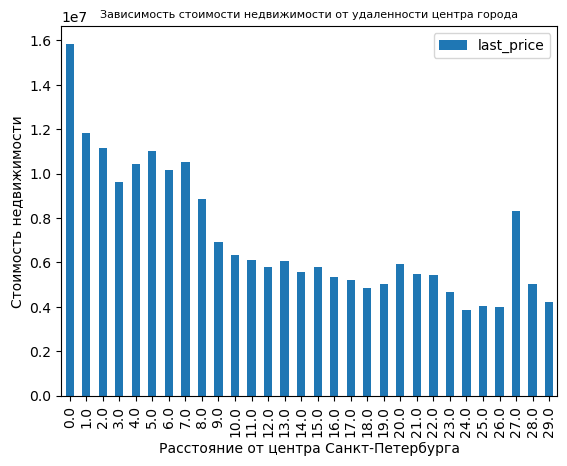

In [105]:
display('Корреляция между стоимостью невижимости в Санкт-Петербурге и расстоянием от центра города составляет:', data['city_centers_nearest_km'].corr(data['last_price']))
data[data['locality_name']=='санкт-петербург'].pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot(kind='bar');
plt.title('Зависимость стоимости недвижимости от удаленности центра города', fontsize=8)
plt.ylabel('Стоимость недвижимости')
plt.xlabel('Расстояние от центра Санкт-Петербурга')
plt.legend()
plt.show()

Как и следовало ожидать, чем ближе к центру - тем дороже средняя цена квартиры, корреляция отрицательная. С увеличением расстояния цена снижается за исключением некоторых отметок: с 4 по 7 км, с 20 по 22 км и  27 по 29 км наблюдается некоторый рост, что может быть связано с особенностями районов на этом расстоянии (например, кварталы с элитным жильем и т.п.).

## Общий вывод.
Перед началом анализа была изучена общая информация о полученных данных и выполнена их предобработка: выявлены и заменены неявные дубликаты населенных пунктов, строки с аномальными численными значениями удалены или заменены на медианные, пропущенные численные значения также заменены на медианные, заменены типы данных. Часть недвижимости с необычными параметрами, такими как большая площадь или стоимость, были удалены, т.к. сравнивать ее со стандартным, более распространенным жильем некорректно. Таким образом из данных были удалены 486 из 23699 (около 2%).  Также таблица дополнена новыми столбцами, необходимыми для анализа.
После предобработки и дополнительных рассчетов и категоризации данных можно сделать следующие выводы:

1. В среднем недвижимость продается в срок от 94 до 170 дней, продажи быстрее 45 дней и дольше 430 дней можно считать аномальными. 

2. Цена в большей степени зависит от общей площади недвижимости, чем от жилой и кухоной площадей или от количества комнат.

3. Зависимость стоимости недвижимости от дня публикования объявления:
- от дня недели минимальная: в четверг - самая высокая средняя стоимость, в субботу - самая низкая; по медианная цена самая высокая во вторник, самый низкая - на пятницу; разница стоимости между днями незначительная.
- от месяца также минимальная: самая высокая средняя цена - в ноябре,  в июне - минимальная; медианная же цена имеет самый высокий пик- в апреле и самый низкий - в июне.
- от года продажи явная: и средняя и медианная цены были максимальными в 2014 году, далее стоимость недвижимости падала до до 2018 года, начиная с 2019 снова наблюдается рост.

4. 3/4 всей продаваемой недвижимости находится в Санкт-Петербурге, при этом по стоимости за 1 м2 недвижимость Санкт-Петербурга занимает второе место, на первом - Зеленогорск, что связано с малым количеством объявлений в Зеленогорске в сравнении с Санкт-Петербургом. Самая низкая цена, что ожидаемо, в деревне, в Ставрополье, и остальные позиции с низкой ценой за метр также занимают деревни и поселки.

5. Подтверждена зависимость стоимости недвижимости в Санкт-Петербурге от расстояния до центра города: чем ближе к центру, тем выше стоимость недвижимости. Но также есть недвижимость на дальнем расстоянии практически равная по стоимости более близкой к центру недвижимости.   

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод